# Bank Customer Segmentation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import datetime
import time
from scipy.stats import shapiro, probplot, f_oneway
import scipy.stats as stats
import plotly.express as px
import IPython

In [2]:
banking = pd.read_csv("bank_transactions.csv", index_col=0)
banking.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
TransactionID,,,,,,,,
T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [3]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048567 entries, T1 to T1048567
Data columns (total 8 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CustomerID               1048567 non-null  object 
 1   CustomerDOB              1045170 non-null  object 
 2   CustGender               1047467 non-null  object 
 3   CustLocation             1048416 non-null  object 
 4   CustAccountBalance       1046198 non-null  float64
 5   TransactionDate          1048567 non-null  object 
 6   TransactionTime          1048567 non-null  int64  
 7   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 72.0+ MB


### Explaining the columns

CustomerID: ID of an individual customer

CustomerDOB: Customers Date of birth as string converted to datetype

CustGender: Male and Female (There is on T which is removed during data cleaning)

CustLocation: City(Location) of the transaction Categorical

CustAccountBalance: Balance in customer account as float

TransactionDate: Transaction date as string converted to datetime format

TransactionTime: Time the transaction took place as integer converted to time

TransactionAmount: Amount spent by the customer as float


In [4]:
banking.nunique()

CustomerID                 884265
CustomerDOB                 17254
CustGender                      3
CustLocation                 9355
CustAccountBalance         161328
TransactionDate                55
TransactionTime             81918
TransactionAmount (INR)     93024
dtype: int64

### Preprocessing
#### Data Cleaning
##### Removing null values

In [5]:
null_val = banking.isnull().sum()
total_count = len(banking)
percentage = (null_val/total_count)*100
percentage

CustomerID                 0.000000
CustomerDOB                0.323966
CustGender                 0.104905
CustLocation               0.014401
CustAccountBalance         0.225927
TransactionDate            0.000000
TransactionTime            0.000000
TransactionAmount (INR)    0.000000
dtype: float64

In [6]:
banking.dropna(inplace=True)

In [7]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041614 entries, T1 to T1048567
Data columns (total 8 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CustomerID               1041614 non-null  object 
 1   CustomerDOB              1041614 non-null  object 
 2   CustGender               1041614 non-null  object 
 3   CustLocation             1041614 non-null  object 
 4   CustAccountBalance       1041614 non-null  float64
 5   TransactionDate          1041614 non-null  object 
 6   TransactionTime          1041614 non-null  int64  
 7   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 71.5+ MB


#### Working with Date and Time

In [8]:
banking['CustomerDOB'].value_counts().sort_values(ascending=False)

CustomerDOB
1/1/1800    56292
1/1/89        809
1/1/90        784
6/8/91        698
1/1/91        665
            ...  
17/1/59         1
15/4/41         1
4/8/34          1
6/9/71          1
24/10/44        1
Name: count, Length: 17233, dtype: int64

In [9]:
56292/len(banking)

0.05404305241673019

Since it is less than half a percentage, I decided to drop the rows with value 1/1/1800

In [10]:
banking = banking[banking['CustomerDOB'] != '1/1/1800']

In [11]:
banking.nunique()

CustomerID                 839081
CustomerDOB                 17232
CustGender                      2
CustLocation                 8164
CustAccountBalance         152833
TransactionDate                55
TransactionTime             81394
TransactionAmount (INR)     86783
dtype: int64

In [12]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985322 entries, T1 to T1048567
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CustomerID               985322 non-null  object 
 1   CustomerDOB              985322 non-null  object 
 2   CustGender               985322 non-null  object 
 3   CustLocation             985322 non-null  object 
 4   CustAccountBalance       985322 non-null  float64
 5   TransactionDate          985322 non-null  object 
 6   TransactionTime          985322 non-null  int64  
 7   TransactionAmount (INR)  985322 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 67.7+ MB


In [13]:
banking['TransactionTime'].value_counts().sort_index()
banking[banking['TransactionTime'] < 10000].value_counts()

CustomerID  CustomerDOB  CustGender  CustLocation  CustAccountBalance  TransactionDate  TransactionTime  TransactionAmount (INR)
C1010337    27/12/93     M           DELHI         25000.00            14/9/16          3011             1217.33                    1
C6355227    13/8/96      F           DELHI         30109.84            21/8/16          4312             1091.00                    1
C6358945    3/10/92      M           KOLKATA       8971.75             7/9/16           4842             118.00                     1
C6359319    9/2/77       M           MUMBAI        74931.78            6/8/16           1154             3005.00                    1
C6360982    4/2/89       F           BANGALORE     34109.35            30/8/16          4441             200.00                     1
                                                                                                                                   ..
C3632936    21/11/91     M           BANGALORE     825.38          

In [14]:
banking['CustomerDOB'].value_counts().sort_index()

CustomerDOB
1/1/00      5
1/1/01     10
1/1/02      4
1/1/30      1
1/1/31      2
         ... 
9/9/93    106
9/9/94     60
9/9/95     49
9/9/96     42
9/9/97     37
Name: count, Length: 17232, dtype: int64

In [15]:
banking['CustomerDOB'] = pd.to_datetime(banking['CustomerDOB'], dayfirst=True)
banking['TransactionDate'] = pd.to_datetime(banking['TransactionDate'], dayfirst=True)
banking.head()

/var/folders/d3/tyh_8tdj07j5x43s02009nf80000gn/T/ipykernel_6123/3323303770.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banking['CustomerDOB'] = pd.to_datetime(banking['CustomerDOB'], dayfirst=True)
/var/folders/d3/tyh_8tdj07j5x43s02009nf80000gn/T/ipykernel_6123/3323303770.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banking['TransactionDate'] = pd.to_datetime(banking['TransactionDate'], dayfirst=True)


,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
TransactionID,,,,,,,,
T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5


In [16]:
banking.CustomerDOB.min(), banking.CustomerDOB.max()

(Timestamp('1973-01-01 00:00:00'), Timestamp('2072-12-31 00:00:00'))

In [17]:
def date_fixer(item):
    if (item.year > 2000): # Assuming the customer was at least 16 years old when the transaction was made
        year = item.year - 100
    else:
        year = item.year
    return datetime.date(year, item.month, item.day)

In [18]:
banking['CustomerDOB'] = banking['CustomerDOB'].apply(date_fixer)
banking['CustomerDOB'] = pd.to_datetime(banking['CustomerDOB'], dayfirst=True)

In [19]:
## Adding age to the dataframe
age_timedelta = banking['TransactionDate'] - banking['CustomerDOB']
banking['CustomerAge'] = age_timedelta // pd.Timedelta(days=365)
banking.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
TransactionID,,,,,,,,,
T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,19
T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,42
T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


There are more than 16000 column with value less than 10000 which can be considered as 1 AM and any value below 10000 is 00:59:59 or ahead so need to convert the transaction time.

In [20]:
banking['TransactionTime'] = banking['TransactionTime'].astype(str)
banking['TransactionTime'] = banking['TransactionTime'].str.zfill(6)
banking['TransactionTime'] = pd.to_datetime(banking['TransactionTime'], format='%H%M%S')
banking['TransactionTime'] = banking['TransactionTime'].dt.time

banking.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
TransactionID,,,,,,,,,
T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,14:32:07,25.0,22
T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,14:18:58,27999.0,59
T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,14:27:12,459.0,19
T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,14:27:14,2060.0,42
T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,18:11:56,1762.5,28


In [21]:
## Adding DayofWeek to dataframe

banking['DayOfWeek'] = banking['TransactionDate'].dt.day_name()
banking

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,DayOfWeek
TransactionID,,,,,,,,,,
T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,14:32:07,25.0,22,Tuesday
T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,14:18:58,27999.0,59,Tuesday
T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,14:27:12,459.0,19,Tuesday
T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,14:27:14,2060.0,42,Tuesday
T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,18:11:56,1762.5,28,Tuesday
...,...,...,...,...,...,...,...,...,...,...
T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0,26,Sunday
T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0,24,Sunday
T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0,27,Sunday


In [22]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985322 entries, T1 to T1048567
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CustomerID               985322 non-null  object        
 1   CustomerDOB              985322 non-null  datetime64[ns]
 2   CustGender               985322 non-null  object        
 3   CustLocation             985322 non-null  object        
 4   CustAccountBalance       985322 non-null  float64       
 5   TransactionDate          985322 non-null  datetime64[ns]
 6   TransactionTime          985322 non-null  object        
 7   TransactionAmount (INR)  985322 non-null  float64       
 8   CustomerAge              985322 non-null  int64         
 9   DayOfWeek                985322 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 82.7+ MB


In [23]:
numeric_col = ['CustAccountBalance', 'TransactionAmount (INR)', 'CustomerAge']
banking[numeric_col].describe()

,CustAccountBalance,TransactionAmount (INR),CustomerAge
count,9.853220e+05,9.853220e+05,985322.000000
mean,1.060612e+05,1.452425e+03,30.777423
std,8.179054e+05,6.139765e+03,8.983212
min,0.000000e+00,0.000000e+00,15.000000
25%,4.582132e+03,1.510000e+02,25.000000
50%,1.600630e+04,4.310000e+02,28.000000
75%,5.375908e+04,1.125000e+03,34.000000
max,1.150355e+08,1.560035e+06,115.000000


#### Data Exploration

##### Correlation

In [24]:
banking_corr = banking.corr(numeric_only=True)
banking_corr

,CustAccountBalance,TransactionAmount (INR),CustomerAge
CustAccountBalance,1.000000,0.060988,0.118601
TransactionAmount (INR),0.060988,1.000000,0.100580
CustomerAge,0.118601,0.100580,1.000000


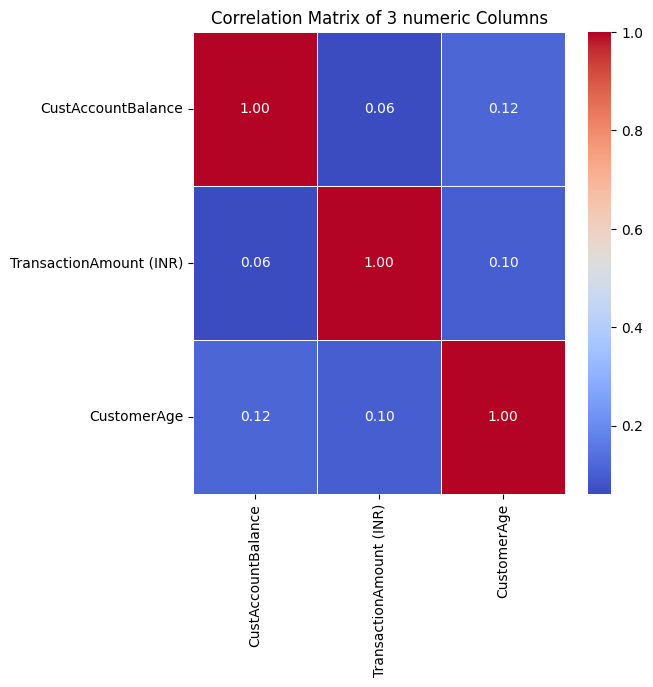

In [25]:
#mask = np.abs(credit_corr) <= 0.25
plt.figure(figsize=(6, 6))
sns.heatmap(banking_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)# , mask=mask)
plt.title('Correlation Matrix of 3 numeric Columns')
plt.show()

None of the correlation are interest which can make it worth investigating

In [26]:
def format_amount(value, pos):
    if value >= 1e6:
        return f'{value / 1e6:.1f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.1f}K'
    else:
        return f'{value:.1f}'

### Figuring out outliers

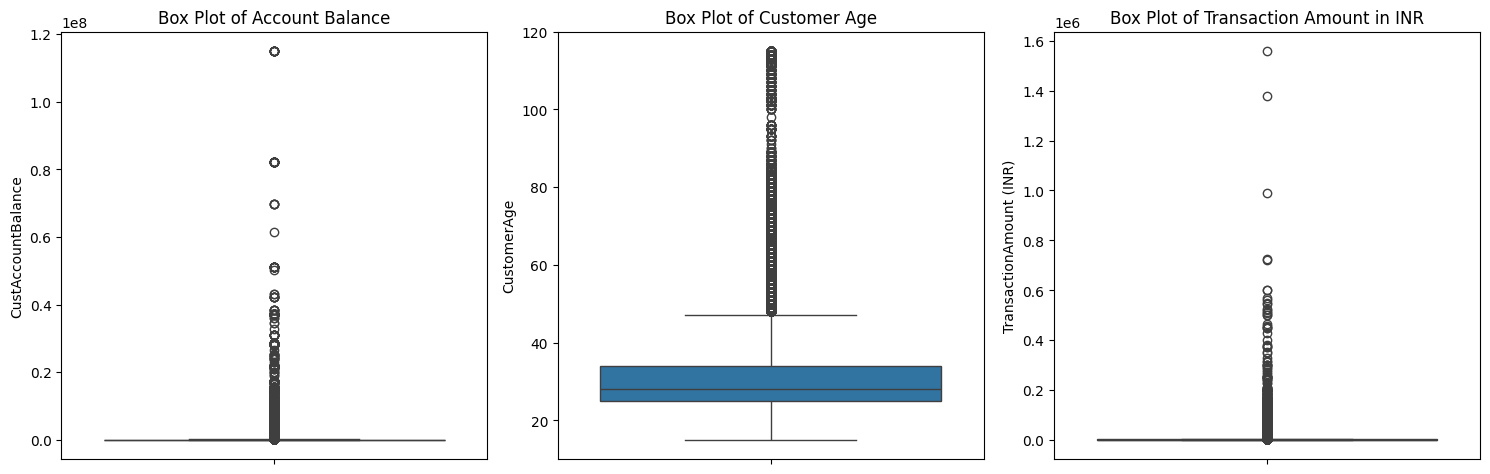

In [27]:
# Box plot for Age
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y='CustAccountBalance', data=banking)
plt.title('Box Plot of Account Balance')

# Box plot for banking amount
plt.subplot(1, 3, 2)
sns.boxplot(y='CustomerAge', data=banking)
plt.title('Box Plot of Customer Age')

# Box plot for Duration
plt.subplot(1, 3, 3)
sns.boxplot(y='TransactionAmount (INR)', data=banking)
plt.title('Box Plot of Transaction Amount in INR')

plt.tight_layout()
plt.show()

In [28]:

# Assuming 'banking' is your DataFrame
# Select the 'CustAccountBalance' column
banking_amount = banking['CustAccountBalance']

# Calculate the first quartile (Q1)
Q1 = banking_amount.quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = banking_amount.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bal = Q1 - 1.5 * IQR
upper_bal = Q3 + 1.5 * IQR

# Identify outliers
bal_outliers = banking_amount[(banking_amount < lower_bal) | (banking_amount > upper_bal)]

# Display the outliers
print(f'Upper bound: {upper_bal}, Lower bound: {lower_bal}')


Upper bound: 127524.50125, Lower bound: -69183.28875


In [29]:
balance_out = banking['CustAccountBalance'] > upper_bal
outlier_balance = balance_out.value_counts()
outlier_balance/ len(banking)*100, outlier_balance

(CustAccountBalance
 False    86.73936
 True     13.26064
 Name: count, dtype: float64,
 CustAccountBalance
 False    854662
 True     130660
 Name: count, dtype: int64)

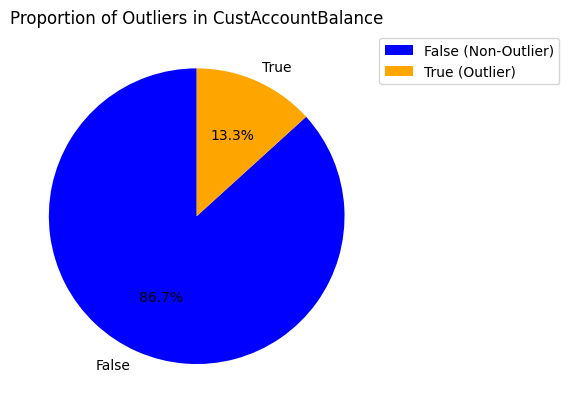

In [30]:
plt.pie(outlier_balance, labels=outlier_balance.index, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=90)
plt.title('Proportion of Outliers in CustAccountBalance')
plt.legend(['False (Non-Outlier)', 'True (Outlier)'], loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

In [31]:

# Assuming 'banking' is your DataFrame
# Select the 'TransactionAmount (INR)' column
transact = banking['TransactionAmount (INR)']

# Calculate the first quartile (Q1)
Q1 = transact.quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = transact.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_transact = Q1 - 1.5 * IQR
upper_transact = Q3 + 1.5 * IQR

# Identify outliers
transact_outliers = transact[(transact < lower_transact) | (transact > upper_transact)]

# Display the outliers
print(f'Upper bound: {upper_transact}, Lower bound: {lower_transact}')


Upper bound: 2586.0, Lower bound: -1310.0


In [32]:
transact_out = banking['TransactionAmount (INR)'] > upper_transact
outlier_transact = transact_out.value_counts()
outlier_transact/ len(banking)*100, outlier_transact

(TransactionAmount (INR)
 False    89.265844
 True     10.734156
 Name: count, dtype: float64,
 TransactionAmount (INR)
 False    879556
 True     105766
 Name: count, dtype: int64)

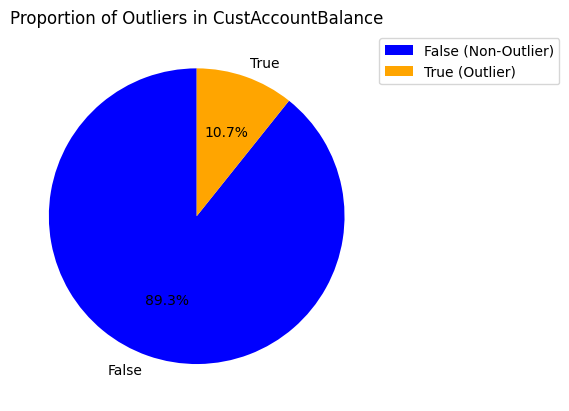

In [33]:
plt.pie(outlier_transact, labels=outlier_transact.index, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=90)
plt.title('Proportion of Outliers in CustAccountBalance')
plt.legend(['False (Non-Outlier)', 'True (Outlier)'], loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

### Evaluating transaction based on location

In [34]:
city_transaction_total = banking.groupby('CustLocation')['TransactionAmount (INR)'].sum()
sorted_cities = city_transaction_total.sort_values(ascending=False)
top_20_cities = sorted_cities.head(20)
print(top_20_cities)


CustLocation
MUMBAI           1.616925e+08
NEW DELHI        1.305968e+08
BANGALORE        1.054833e+08
GURGAON          1.011668e+08
DELHI            9.302718e+07
NOIDA            4.189667e+07
KOLKATA          4.072906e+07
CHENNAI          3.824579e+07
PUNE             3.496158e+07
HYDERABAD        3.085922e+07
THANE            2.552022e+07
GHAZIABAD        2.245411e+07
NAVI MUMBAI      1.748356e+07
AHMEDABAD        1.682257e+07
FARIDABAD        1.349102e+07
CHANDIGARH       1.322180e+07
ALLAHABAD        1.168193e+07
JAIPUR           1.140384e+07
LUCKNOW          1.073402e+07
VISAKHAPATNAM    8.413695e+06
Name: TransactionAmount (INR), dtype: float64


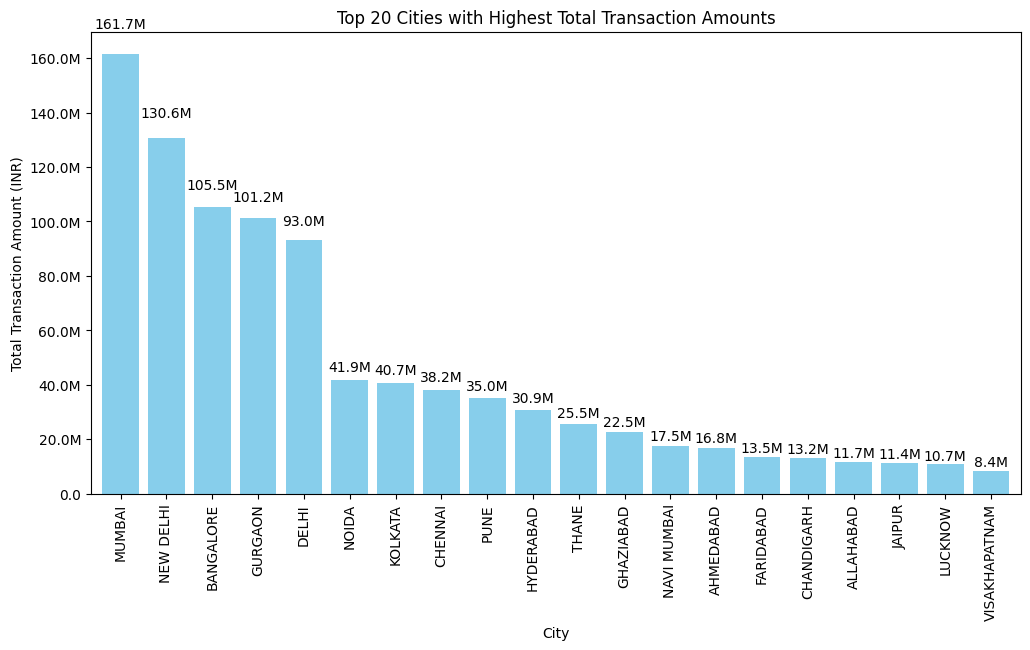

In [35]:


# Plot the bar chart with wider bars
fig, ax = plt.subplots(figsize=(12, 6))
bars = top_20_cities.plot(kind='bar', color='skyblue', width=0.8, ax=ax)

# Display the total transaction amount on top of each bar with formatted labels
for bar in bars.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.05 * height,
            format_amount(height, None), ha='center', va='bottom')

# Set y-axis label formatter
ax.yaxis.set_major_formatter(FuncFormatter(format_amount))

# Set plot labels and title
plt.title('Top 20 Cities with Highest Total Transaction Amounts')
plt.xlabel('City')
plt.ylabel('Total Transaction Amount (INR)')

# Show the plot
plt.show()


In [36]:
city_transaction_counts = banking['CustLocation'].value_counts().head(20)
city_transaction_counts

CustLocation
MUMBAI         97679
BANGALORE      77751
NEW DELHI      76380
GURGAON        70518
DELHI          67335
NOIDA          31675
CHENNAI        27500
PUNE           24493
HYDERABAD      21819
THANE          21006
KOLKATA        19033
GHAZIABAD      14624
NAVI MUMBAI    11932
AHMEDABAD      11266
FARIDABAD      10641
JAIPUR          9231
CHANDIGARH      8801
LUCKNOW         7338
MOHALI          5828
SURAT           5173
Name: count, dtype: int64

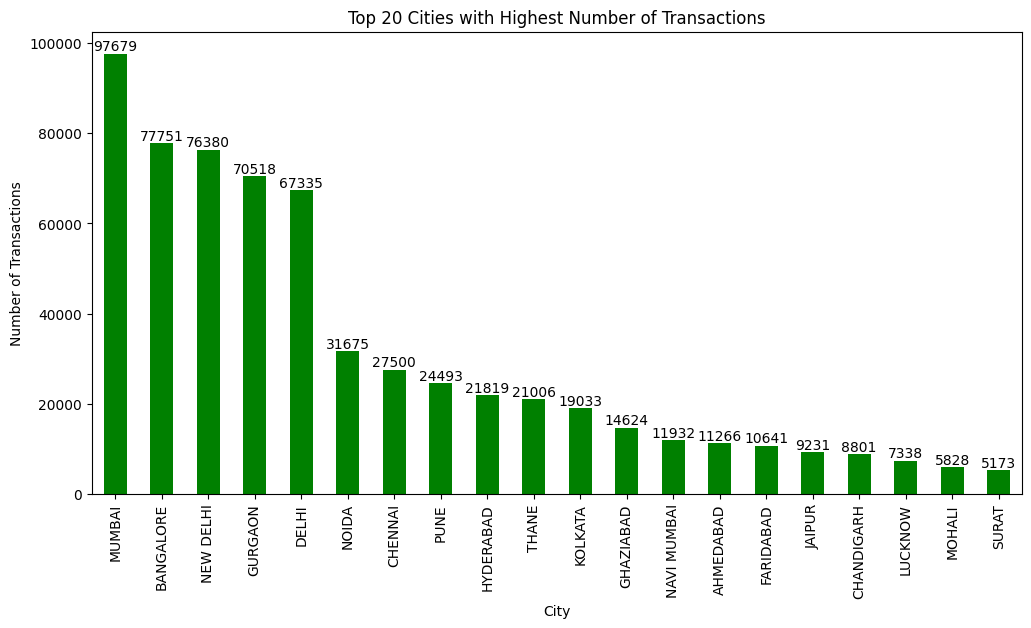

In [37]:
# Plot the bar chart
plt.figure(figsize=(12, 6))
ax = city_transaction_counts.plot(kind='bar', color='green')

# Add labels and title
plt.xlabel('City')
plt.ylabel('Number of Transactions')
plt.title('Top 20 Cities with Highest Number of Transactions')
for i, v in enumerate(city_transaction_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')


# Display the plot
plt.show()

In [38]:
city_transaction_mean = banking.groupby('CustLocation')['TransactionAmount (INR)'].mean()
sorted_cities_mean = city_transaction_mean.sort_values(ascending=False)
top_20_cities_mean = sorted_cities_mean.head(20)
print(top_20_cities_mean)


CustLocation
ROOMFORD                             117621.000000
MUNCHEN                              112592.857143
MILTON KEYNES                        103579.000000
NAPERVILLE                            87658.750000
PHASE-01 HINJEWADI PUNE               60000.000000
WEST HARTFORD                         54107.500000
EAST SIKKIM GANGTOK                   52984.432500
PORT HARTCOURT                        51586.500000
SOUTHALL                              50770.000000
GATE NO 4 MUMBAI                      50584.294091
NAHARLAGUN                            50412.750000
OUTERRING ROAD BANGLORE               50000.000000
MIRAMAR PANAJI                        47500.000000
RAMAPURAM CHENNAI                     45126.428571
MANDIR DHANBAD                        44712.000000
ANNAPOORNESHWARI TEMPLE BANGALORE     41762.857143
RD BANGALORE                          41472.307143
MYSORE RD BANGALORE                   40000.000000
GAIGHATA                              40000.000000
GARDEN NAVI MUMBAI

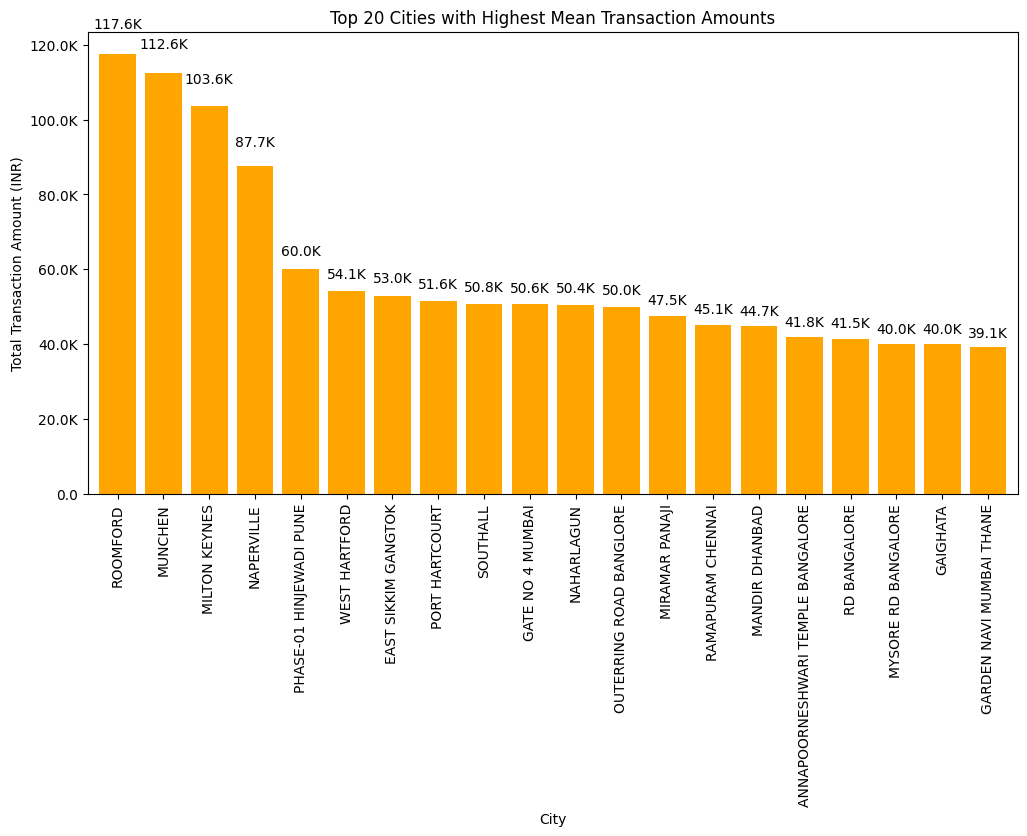

In [39]:


# Plot the bar chart with wider bars
fig, ax = plt.subplots(figsize=(12, 6))
bars = top_20_cities_mean.plot(kind='bar', color='orange', width=0.8, ax=ax)

# Display the total transaction amount on top of each bar with formatted labels
for bar in bars.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.05 * height,
            format_amount(height, None), ha='center', va='bottom')

# Set y-axis label formatter
ax.yaxis.set_major_formatter(FuncFormatter(format_amount))

# Set plot labels and title
plt.title('Top 20 Cities with Highest Mean Transaction Amounts')
plt.xlabel('City')
plt.ylabel('Total Transaction Amount (INR)')

# Show the plot
plt.show()


In [40]:
customer_transaction = banking.groupby('CustomerID')['TransactionAmount (INR)'].sum()
sorted_customer = customer_transaction.sort_values(ascending=False)
top_20_customer = sorted_customer.head(20)
top_20_customer


CustomerID
C7319271    1560034.99
C6677159    1380002.88
C4141768     991132.22
C8217728     724472.00
C1830891     720001.16
C6549785     600008.32
C5036642     600003.45
C4328064     569500.27
C1425138     561001.00
C3528755     550972.34
C7549492     543699.36
C1115779     525003.83
C5938826     520009.87
C8755262     514320.00
C7730454     510005.16
C5720892     500000.00
C7621341     499866.00
C2195882     465633.00
C7367184     455122.00
C7525532     453000.00
Name: TransactionAmount (INR), dtype: float64

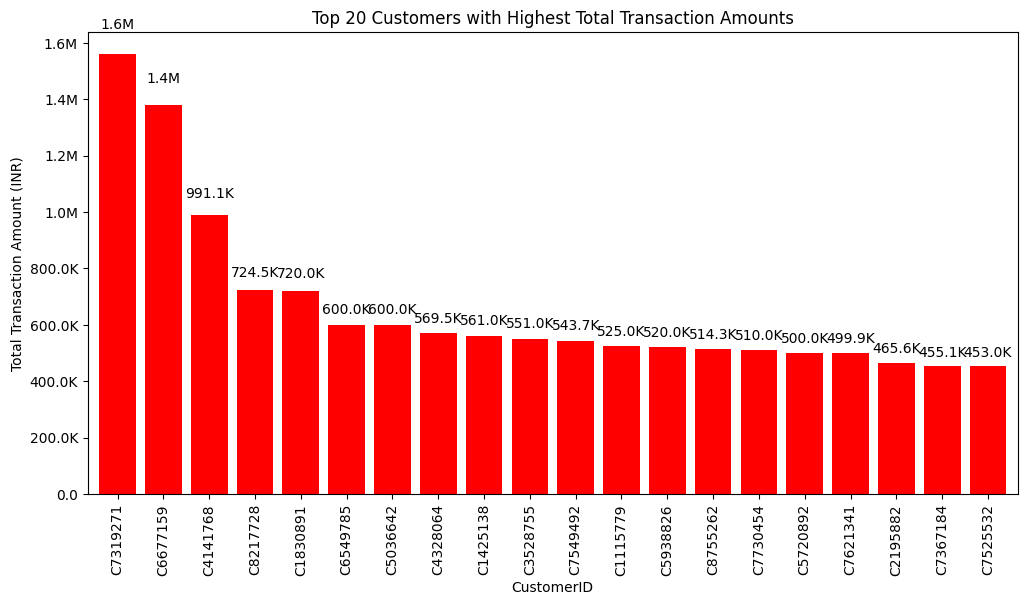

In [41]:
fig, ax = plt.subplots(figsize=(12, 6))
bars = top_20_customer.plot(kind='bar', color='red', width=0.8, ax=ax)

# Display the total transaction amount on top of each bar with formatted labels
for bar in bars.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.05 * height,
            format_amount(height, None), ha='center', va='bottom')

# Set y-axis label formatter
ax.yaxis.set_major_formatter(FuncFormatter(format_amount))

# Set plot labels and title
plt.title('Top 20 Customers with Highest Total Transaction Amounts')
plt.xlabel('CustomerID')
plt.ylabel('Total Transaction Amount (INR)')

# Show the plot
plt.show()


### Exploring day of the week for evaluation

In [42]:
average_transactions_per_day = banking.groupby('DayOfWeek')['TransactionAmount (INR)'].mean().round(2)
average_transactions_per_day

dayofweek_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_dtype = pd.CategoricalDtype(categories=dayofweek_order, ordered=True)
banking['DayOfWeek'] = banking['DayOfWeek'].astype(cat_dtype)
average_transactions_per_day

DayOfWeek
Friday       1428.62
Monday       1438.07
Saturday     1569.01
Sunday       1539.99
Thursday     1410.84
Tuesday      1377.30
Wednesday    1381.20
Name: TransactionAmount (INR), dtype: float64

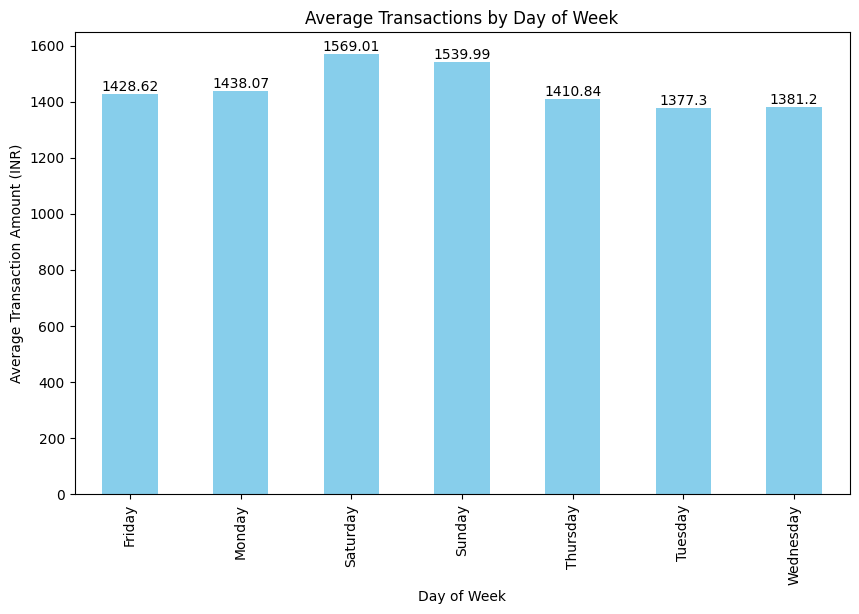

In [43]:
dayofweek_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
tpd = average_transactions_per_day.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Day of Week')
plt.ylabel('Average Transaction Amount (INR)')
plt.title('Average Transactions by Day of Week')

for i, v in enumerate(average_transactions_per_day):
    tpd.text(i, v + 0.1, str(v), ha='center', va='bottom')
# Display the plot
plt.show()


<Axes: xlabel='CustGender', ylabel='TransactionAmount (INR)'>

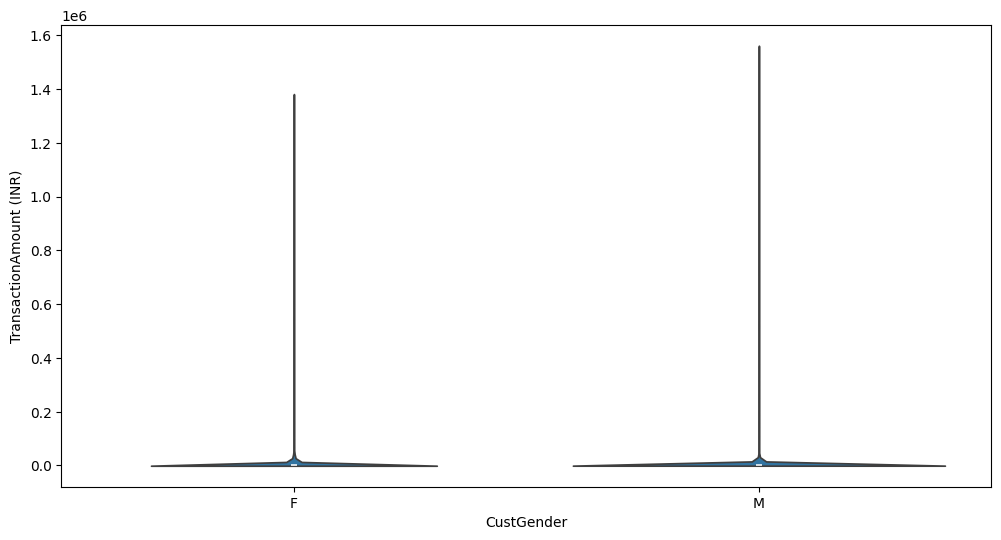

In [44]:
plt.figure(figsize=(12,6))
sns.violinplot(x=banking['CustGender'], y=banking['TransactionAmount (INR)'])

### Normality of Data

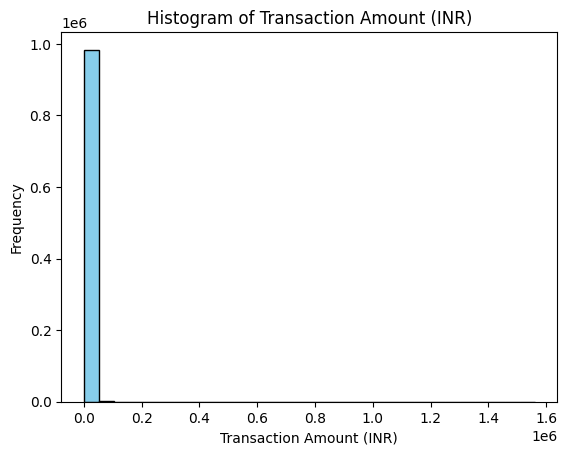

In [45]:
plt.hist(banking['TransactionAmount (INR)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Transaction Amount (INR)')
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Frequency')
plt.show()

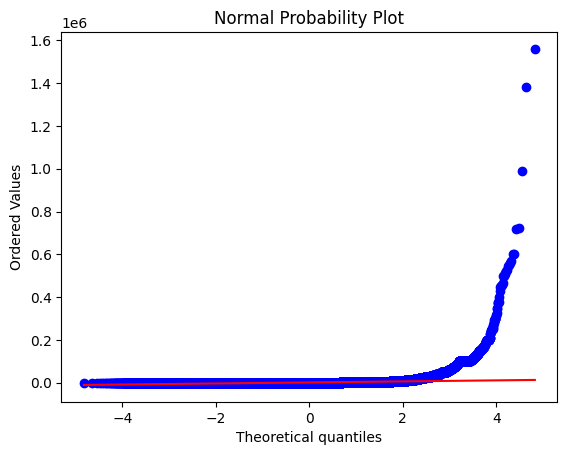

In [46]:
probplot(banking['TransactionAmount (INR)'], dist='norm', plot=plt)
plt.title('Normal Probability Plot')
plt.show()

In [47]:
stat, p_value = shapiro(banking['TransactionAmount (INR)'])
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print('Fail to reject the null hypothesis. The data may be normally distributed.')
else:
    print('Reject the null hypothesis. The data is not normally distributed.')

Shapiro-Wilk Test Statistic: 0.15494579076766968, p-value: 0.0
Reject the null hypothesis. The data is not normally distributed.


/Users/sukritpant/Library/Python/3.9/lib/python/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


As the Data is not normal, there needs to be an assumption made that the Hypothesis testing is performed on a Normally distributed data
### Hypothesis testing

Null Hypothesis (H0): The mean transaction amount is the same for all genders.

Alternative Hypothesis (H1): There is a significant difference in the mean transaction amount between genders.

In [48]:
banking_cleaned = banking.dropna(subset=['CustAccountBalance', 'CustGender'])


In [49]:
# Drop rows with missing values in 'TransactionAmount (INR)' or 'CustGender'
banking_cleaned = banking.dropna(subset=['TransactionAmount (INR)', 'CustGender'])

# Separate transaction amounts for each gender
male_amounts = banking_cleaned['TransactionAmount (INR)'][banking_cleaned['CustGender'] == 'M']
female_amounts = banking_cleaned['TransactionAmount (INR)'][banking_cleaned['CustGender'] == 'F']

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(male_amounts, female_amounts, equal_var=False, nan_policy='omit')

# Print the t-statistic and p-value
print(f'T-Statistic: {t_statistic}, p-value: {p_value}')

# Check if the difference is statistically significant
if p_value < 0.05:
    print('The difference in transaction amounts between genders is statistically significant.')
else:
    print('There is no significant difference in transaction amounts between genders.')

T-Statistic: -14.506140682982995, p-value: 1.1336039881776125e-47
The difference in transaction amounts between genders is statistically significant.


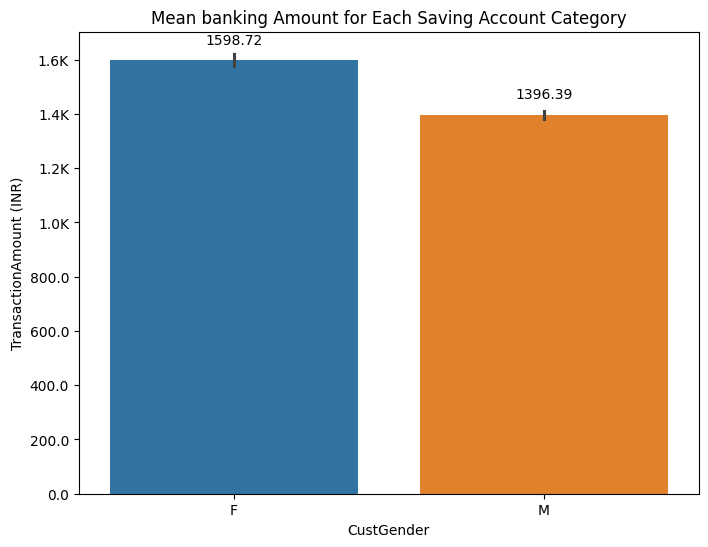

In [50]:
mean_values = banking.groupby('CustGender')['TransactionAmount (INR)'].mean().reset_index()

# Plotting the mean banking amount for each category
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='CustGender', y='TransactionAmount (INR)', data=banking, estimator=np.mean, hue='CustGender')  # Use estimator=np.median for median

# Add mean values to each category
for i, mean_value in enumerate(mean_values['TransactionAmount (INR)']):
    ax.text(i, mean_value + 100, f'{mean_value:.2f}', ha='center', va='top')

ax.yaxis.set_major_formatter(FuncFormatter(format_amount))

plt.title('Mean banking Amount for Each Saving Account Category')
plt.show()

In [51]:
daily_totals = banking.groupby('TransactionDate')['TransactionAmount (INR)'].sum().reset_index()
daily_means = banking.groupby('TransactionDate')['TransactionAmount (INR)'].mean().reset_index()

In [52]:
fig_total = px.line(daily_totals, x='TransactionDate', y='TransactionAmount (INR)', title='Daily Total Transactions')

fig_mean = px.line(daily_means, x='TransactionDate', y='TransactionAmount (INR)', title='Daily Mean Transactions')


In [53]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=1, shared_xaxes=True, subplot_titles=['Daily Transactions'])

# Initial data for total transactions
fig.add_trace(go.Scatter(x=daily_totals['TransactionDate'], y=daily_totals['TransactionAmount (INR)'],
                         mode='lines', name='Total Transactions'))

# Update menu for dynamic switch between total and mean transactions
updatemenu = []
buttons = [
    dict(label='Total',
         method='update',
         args=[{'y': [daily_totals['TransactionAmount (INR)']]}, {'title': 'Daily Total Transactions'}]),
    dict(label='Mean',
         method='update',
         args=[{'y': [daily_means['TransactionAmount (INR)']]}, {'title': 'Daily Mean Transactions'}]),
]

updatemenu.append(dict(type='buttons', showactive=True, buttons=buttons))

fig.update_layout(showlegend=True, title_text='Transaction Analysis Dashboard', updatemenus=updatemenu)

fig.show()